In [2]:
import gmaps
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
from sklearn import datasets
import matplotlib.pyplot as plt


In [3]:
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V2_CSV.csv')
df = pd.DataFrame(path)
#df.head()

In [77]:
# number of records
print(len(df))

5715


In [79]:
# df_cleaned = df.drop(columns=df.columns[(df['No_of_Skills'] == '0').any()])
cleaned_df = df.dropna(subset=['No_of_Skills'])

# df.loc[df['No_of_Skills']].dropna()
cleaned_df.head(5)


,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0


In [80]:
# Visualize
print(len(cleaned_df))

5483


In [91]:
#create a dataframe to hold the above results
new_df = cleaned_df[["Job_Title", "Job_Type", "Queried_Salary", "Salary_Index", "No_of_Skills", "Skill", "Company_Industry", "Location"]]
#new_df.head()

In [92]:
avg_df=cleaned_df.mean()
avg_df

Unnamed: 0                          2855.391209
Salary_Index                           3.356009
No_of_Skills                           8.133868
No_of_Reviews                       4397.459983
No_of_Stars                            3.845737
Date_Since_Posted                     22.317793
Unnamed: 17                                 NaN
python                                 0.606420
sql                                    0.566113
machine learning                       0.418931
r                                      0.407441
hadoop                                 0.312603
tableau                                0.225424
sas                                    0.171621
spark                                  0.279227
java                                   0.269925
Others                                 0.939632
CA                                     0.243480
NY                                     0.105964
VA                                     0.058909
TX                                     0

In [98]:
job_df =cleaned_df.groupby(by=['Queried_Salary'],as_index=False)['Job_Title', 'Job_Type'].count()
job_df

<ipython-input-98-ac8f7e435dfa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  job_df =cleaned_df.groupby(by=['Queried_Salary'],as_index=False)['Job_Title', 'Job_Type'].count()


,Queried_Salary,Job_Title,Job_Type
0,100000-119999,1360,1360
1,120000-139999,1272,1272
2,140000-159999,862,862
3,80000-99999,894,894
4,<80000,687,687
5,>160000,408,408


In [ ]:
#job_df = cleaned_df.groupby(by=['Queried_Salary'],as_index=False)['Job_Title','Job_Type'].mean()
#job_df

In [90]:
#calculate total number of job type
job_df = new_df['Queried_Salary'].value_counts()
#length of the count of each unique school name
#skill_df_n = len(job_df)
job_df

100000-119999    1360
120000-139999    1272
80000-99999       894
140000-159999     862
<80000            687
>160000           408
Name: Queried_Salary, dtype: int64

In [50]:
avg_skills=new_df.groupby(["Queried_Salary"]).mean()

In [51]:
avg_skill_rename= avg_skills.rename(columns={"No_of_Skills": "Avg_No_Skills"})
avg_skill_rename

,Salary_Index,Avg_No_Skills
Queried_Salary,,
100000-119999,3,8.606618
120000-139999,4,9.767296
140000-159999,5,9.727378
80000-99999,2,6.473154
<80000,1,4.410480
>160000,6,8.007353


In [52]:
salaryIndex_sort=new_df.sort_values(by=["Salary_Index"],inplace = True)
salaryIndex_sort

<ipython-input-52-45a5ee062f37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salaryIndex_sort=new_df.sort_values(by=["Salary_Index"],inplace = True)


In [68]:
#average skill per range of salary
avg_skills=avg_skill_rename.groupby(["Queried_Salary"])
test = avg_skills["Avg_No_Skills"].mean()
test

Queried_Salary
100000-119999    8.606618
120000-139999    9.767296
140000-159999    9.727378
80000-99999      6.473154
<80000           4.410480
>160000          8.007353
Name: Avg_No_Skills, dtype: float64

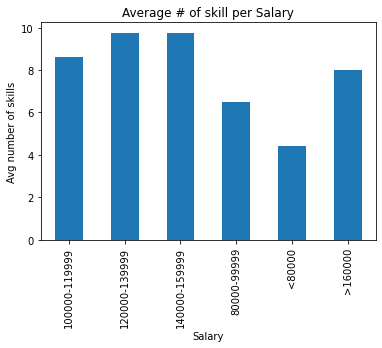

<Figure size 432x288 with 0 Axes>

In [72]:
# Generate a bar plot showing the queried salary and the average number of skills. 
test1=test.plot(kind="bar", title="Average # of skill per Salary")
test1.set_xlabel("Salary")
test1.set_ylabel("Avg number of skills")
plt.show()
plt.tight_layout()

In [348]:
salary=new_df.set_index["Salary_index"]
skills = test.keys()
# Plot the world average as a line chart
skill_avg, = plt.plot(skills, salary, color="blue", label="World Average" )

TypeError: 'method' object is not subscriptable

TypeError: unhashable type: 'numpy.ndarray'

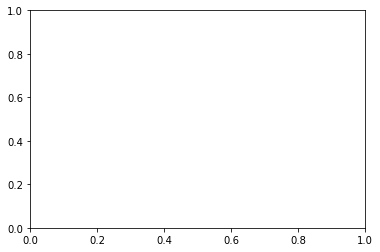

In [345]:
# Plot out skills versus salary 
money = [1,2,3,4,5,6]

plt.plot(money,new_df,color="green", label="skill")

#y_values =df.y_values
#plt.scatter(x_values,y_values)
plt.xlabel('money')
plt.ylabel('Number')
#plt.show()

In [318]:
plt.scatter(test["No_of-Skills"],facecolor="red", marker="o",edgecolor="black")
plt.title("chart")


KeyError: 'No_of-Skills'

In [319]:
combined_df=pd.merge(avg_skills,job_df, how='left', on=["Queried_Salary"])
combined_df

,Queried_Salary,Salary_Index,No_of_Skills,Job_Title,Job_Type
0,100000-119999,3,8.606618,1360,1360
1,120000-139999,4,9.767296,1272,1272
2,140000-159999,5,9.727378,862,862
3,80000-99999,2,6.473154,894,894
4,<80000,1,4.410480,687,687
5,>160000,6,8.007353,408,408


In [285]:
#index_df=combined_df.set_index(["Queried_Salary"])["Salary_Index"]


In [288]:
salary_sort=combined_df.sort_values(["Salary_Index"],ascending = True)
#salary_sort

In [289]:
rename_skill = salary_sort.rename(columns={"No_of_Skills": "Avg_No_Skills"})
rename_skill

,Queried_Salary,Salary_Index,Avg_No_Skills,Job_Title,Job_Type
4,<80000,1,4.410480,687,687
3,80000-99999,2,6.473154,894,894
0,100000-119999,3,8.606618,1360,1360
1,120000-139999,4,9.767296,1272,1272
2,140000-159999,5,9.727378,862,862
5,>160000,6,8.007353,408,408


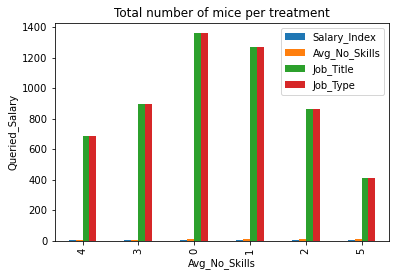

<Figure size 432x288 with 0 Axes>

In [292]:
# Generate a bar plot showing the queried salary and the average number of skills. 
test=rename_skill.plot(kind="bar", title="Total number of mice per treatment")
test.set_xlabel("Avg_No_Skills")
test.set_ylabel("Queried_Salary")
plt.show()
plt.tight_layout()


In [206]:
#new_df["Queried_Salary"]=new_df["Queried_Salary"].str.replace("<", " ")
#new_df["Queried_Salary"]=new_df["Queried_Salary"].str.replace(">", " ")
#new_df["Queried_Salary"]

In [207]:
#new_df["Queried_Salary"]=new_df["Queried_Salary"].astype(float)

data_scientist    2496
data_analyst      1630
data_engineer     1357
Name: Job_Type, dtype: int64

In [113]:
df.iloc[:,5]


Series([], Name: Job_Type, dtype: object)

In [ ]:
 #Column Reordering